In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

In [16]:
df=pd.read_csv("Algerian_forest_fires_dataset.csv")

In [17]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


Data Cleaning

In [19]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [20]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [22]:
df.dropna(axis=0,inplace=True)

In [23]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [24]:
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1

In [25]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [26]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0
246,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1.0


In [27]:
df["Region"]=df["Region"].astype(int)

In [28]:
df.dropna().reset_index(drop=True)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [30]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [34]:
df=df.drop(124).reset_index(drop=True)

In [35]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [36]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [41]:
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [45]:
df.Classes=df.Classes.str.strip()

In [46]:
df.Classes.unique()

array(['not fire', 'fire'], dtype=object)

In [54]:
cols = ["day", "month", "year", "Temperature", "RH", "Rain", "Ws"]

df[cols] = df[cols] \
    .apply(pd.to_numeric, errors='coerce') \
    .fillna(0) \
    .round() \
    .astype(int)


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    int64 
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(8), object(7)
memory usage: 28.6+ KB


In [60]:
objects=[feature for feature in df.columns if df[feature].dtypes=="O"]

In [58]:
df[["Rain"]]=df[["Rain"]].astype(object)

In [62]:
for i in objects:
    if i!="Classes":
        df[i]=df[i].astype(float)

In [63]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.720165,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.015407,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.000000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,17.000000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [64]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.0,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.0,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.0,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [66]:
df.to_csv("cleaned_datset",index=False)

In [67]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.0,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.0,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.0,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [68]:
df1=df.copy()

In [69]:
df1.drop(columns=["day","month","year"],axis=1,inplace=True)

In [84]:
df1.Classes.unique()

array(['not fire', 'fire'], dtype=object)

In [85]:
df["Classes"]=df1["Classes"].replace({"not fire":0,"fire":1})

/var/folders/d8/0vhs_fsn79zfcc0bpkcqbsmh0000gn/T/ipykernel_90317/387519396.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Classes"]=df1["Classes"].replace({"not fire":0,"fire":1})


In [86]:
df1[["Classes"]].value_counts()

Classes 
fire        137
not fire    106
Name: count, dtype: int64

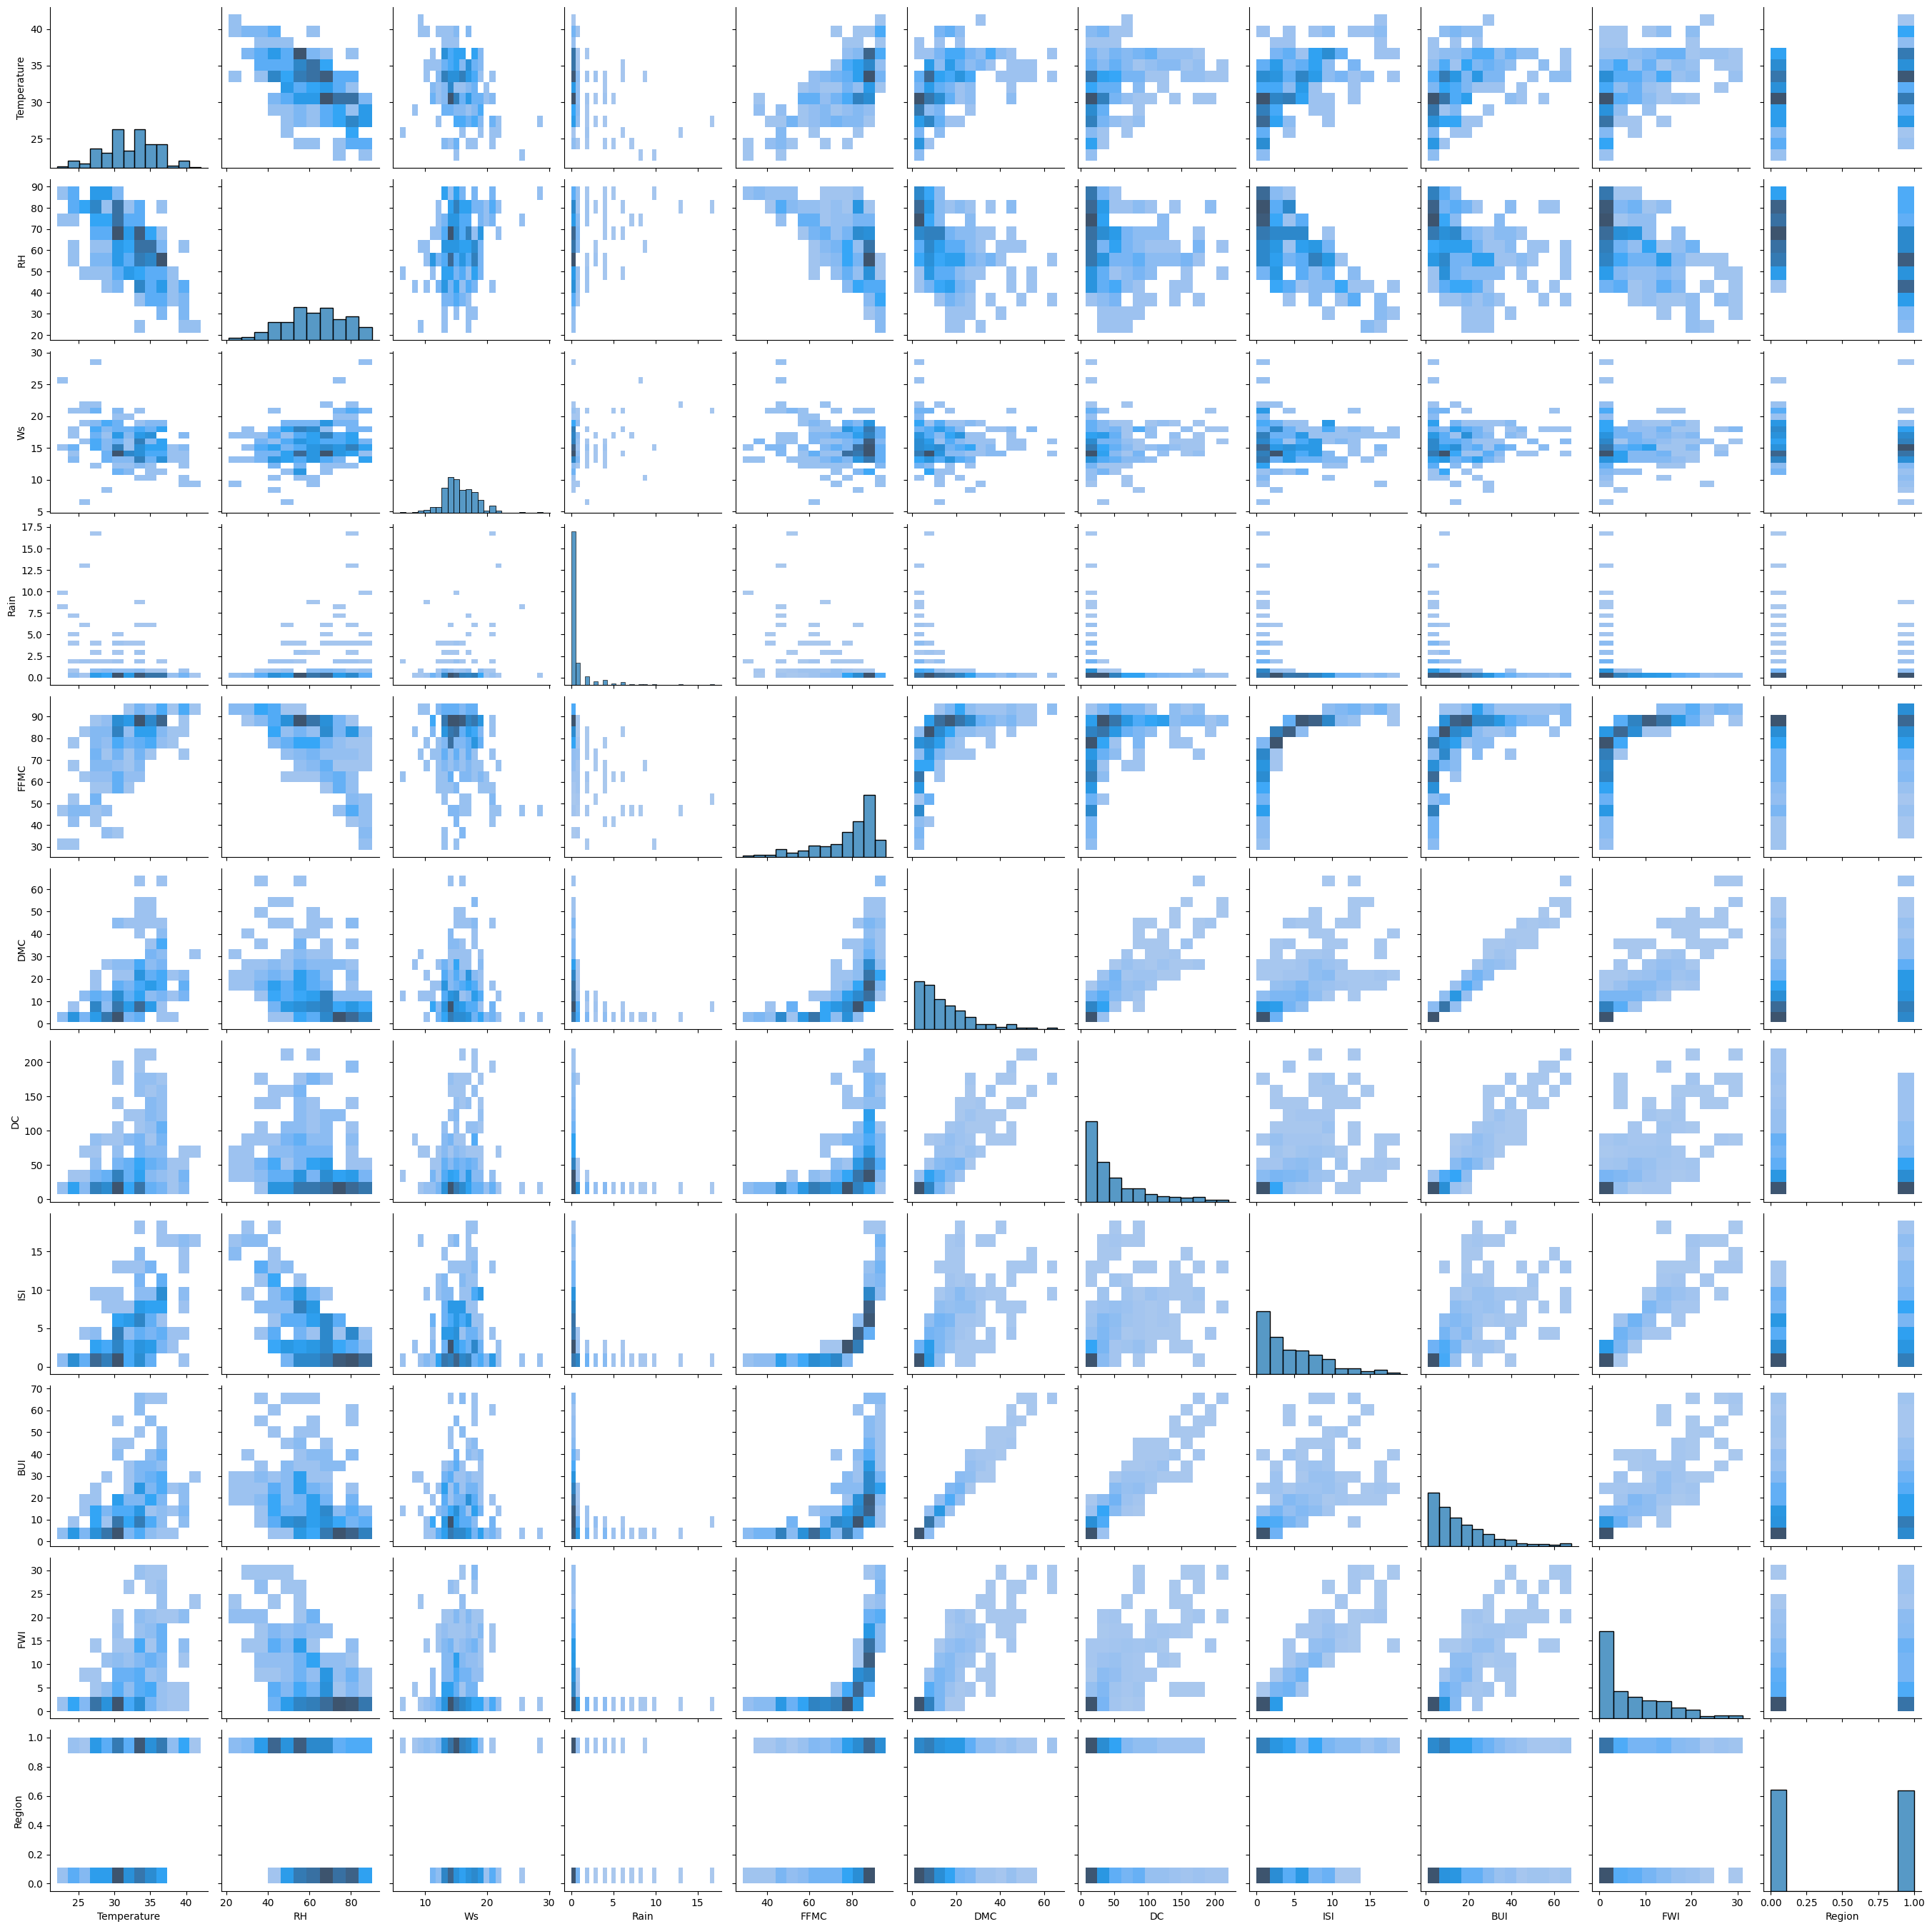

In [87]:
sns.pairplot(df1,kind="hist")

Text(0.5, 1.0, 'Pie Chart of Classes')

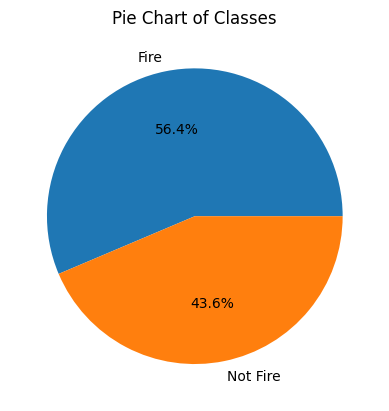

In [88]:
plt.pie(df1["Classes"].value_counts(),autopct="%1.1f%%",labels=["Fire","Not Fire"])
plt.title("Pie Chart of Classes")

In [90]:
df1.corr(numeric_only=True)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
Temperature,1.000000,-0.651400,-0.284510,-0.317969,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.269555
RH,-0.651400,1.000000,0.244048,0.219133,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.402682
Ws,-0.284510,0.244048,1.000000,0.168890,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.181160
Rain,-0.317969,0.219133,0.168890,1.000000,-0.530056,-0.280442,-0.295339,-0.335178,-0.292040,-0.312235,-0.041495
FFMC,0.676568,-0.644873,-0.166548,-0.530056,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.280442,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.192089
DC,0.376284,-0.226941,0.079135,-0.295339,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.335178,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.263197
BUI,0.459789,-0.353841,0.031438,-0.292040,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.089408
FWI,0.566670,-0.580957,0.032368,-0.312235,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.197102


<Axes: >

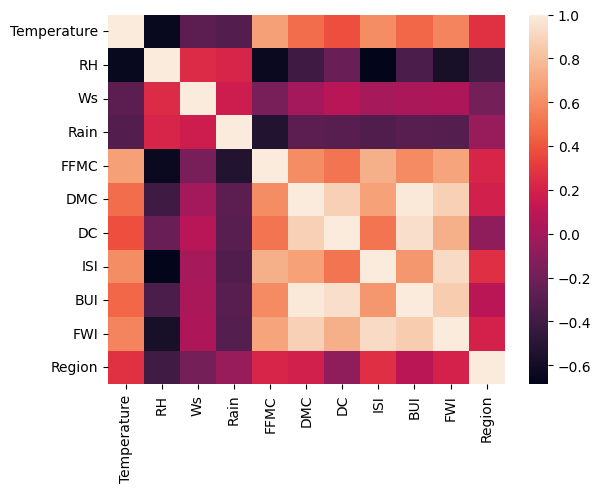

In [92]:
sns.heatmap(df1.corr(numeric_only=True))

<Axes: xlabel='FWI'>

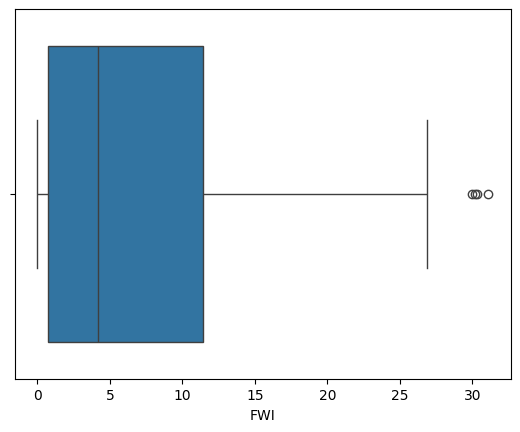

In [96]:
sns.boxplot(x=df1["FWI"])

Text(0.5, 1.0, 'Fire Analysis of Sidi Bel region')

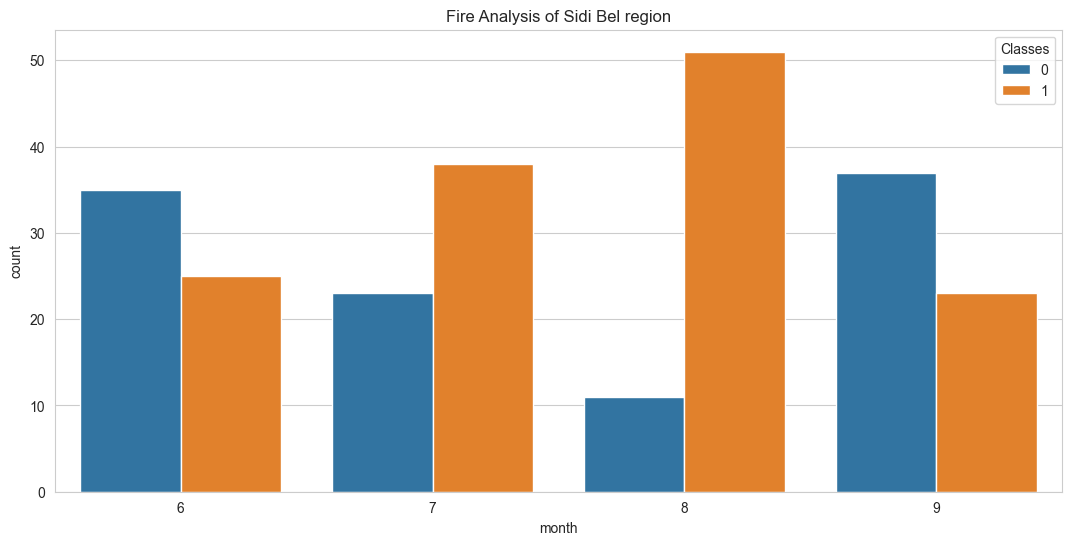

In [101]:
dftemp=[df.loc[df["Region"]==1]]
plt.subplots(figsize=(13,6))
sns.set_style("whitegrid")
sns.countplot(x="month",hue="Classes",data=df,legend="auto")
plt.title("Fire Analysis of Sidi Bel region")

Text(0.5, 1.0, 'Fire Analysis of Birjia region')

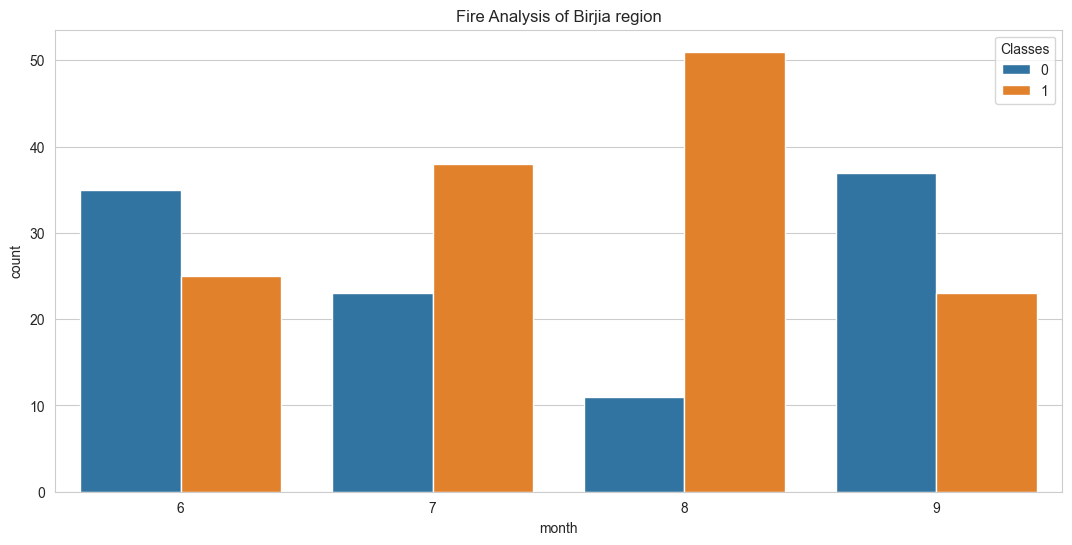

In [103]:
dftemp=[df.loc[df["Region"]==0]]
plt.subplots(figsize=(13,6))
sns.set_style("whitegrid")
sns.countplot(x="month",hue="Classes",data=df,legend="auto")
plt.title("Fire Analysis of Birjia region")